### CS 109A/STAT 121A/AC 209A/CSCI E-109A 

# Lab 1: The Python Numerical stack and EDA

**Harvard University**<br>
**Fall 2017**<br>
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine**

---

# Table of Contents 

<ol start="0">
<li> Learning Goals </li>
<li> Functions </li>
<li> Introduction to Numpy </li>
<li> Introduction to Pandas </li>
<li> Beginning Exploratory Data Analysis (EDA)</li>
<li> Conclusions </li>
</ol>

## Part 0: Learning Goals 
In this lab we pick up where we left off in lab 0, introducing functions and exploring numpy, a module which allows for mathematical manipulation of arrays.  We load a dataset first as a numpy array and then as a pandas dataframe, and begin exploratory data analysis (EDA). 

By the end of this lab, you will be able to:

- Write user-defined functions to perform repetitive tasks.
- Create and manipulate one-dimensional and two-dimensional numpy arrays, and pandas series and dataframes.
- Describe how to index and "type" Pandas Series and Dataframes.
- Create histograms and scatter plots for basic exploratory data analysis


*This lab maps on to lecture 1, lecture 2, lecture 3 and to parts of homework 1.  Next Monday's lecture will address scraping, which is also needed for homework 1.*

We first import the necessary libraries.  Besides the numpy and matplotlib libraries that we saw in lab 0, we also import pandas and seaborn, which will be discussed in more detail in this lab.

In [1]:
# Prepares iPython notebook for working with matplotlib
%matplotlib inline 

import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns #sets up styles and gives us more plotting options

## Part 1: Functions

A *function* object is a reusable block of code that does a specific task.  Functions are all over Python, either on their own or on other objects.  To invoke a function `func`, you call it as `func(arguments)`.

We've seen built-in Python functions and methods.  For example, `len` and `print` are built-in Python functions.  And at the beginning of Lab 0, you called `np.mean` to calculate the mean of three numbers, where `mean` is a function in the numpy module and numpy was abbreviated as `np`. This syntax allow us to have multiple "mean" functions in different modules; calling this one as `np.mean` guarantees that we will pick up numpy's mean function, as opposed to a mean function from a different module.

### Methods
A function that belongs to an object is called a *method*. An example of this is `append` on an existing list. In other words, a *method* is a function on an *instance* of a type of object (also called *class*, in this case, list type).

In [2]:
import numpy as np # imports a fast numerical programming library
np.mean([1, 2, 3, 4, 5])

3.0

In [3]:
float_list = [1.0, 2.09, 4.0, 2.0, 0.444]
print(float_list)
float_list.append(56.7) 
float_list

[1.0, 2.09, 4.0, 2.0, 0.444]


[1.0, 2.09, 4.0, 2.0, 0.444, 56.7]

### User-defined functions

We'll now learn to write our own user-defined functions.  Below is the syntax for defining a basic function with one input argument and one output. You can also define functions with no input or output arguments, or multiple input or output arguments.

```
def name_of_function(arg):
    ...
    return(output)
```

We can write functions with one input and one output argument.  Here are two such functions.

In [4]:
def square(x):
    x_sqr = x*x
    return(x_sqr)

def cube(x):
    x_cub = x*x*x
    return(x_cub)

square(5),cube(5)

(25, 125)

What if you want to return two variables at a time? The usual way is to return a tuple:

In [5]:
def square_and_cube(x):
    x_cub = x*x*x
    x_sqr = x*x
    return(x_sqr, x_cub)

square_and_cube(5)

(25, 125)

### Lambda functions

Often we quickly define mathematical functions with a one-line function called a *lambda* function.  Lambda functions are great because they enable us to write functions without having to name them, ie, they're *anonymous*.  
No return statement is needed. 


In [6]:
square = lambda x: x*x
print(square(3))


hypotenuse = lambda x, y: x*x + y*y

## Same as

# def hypotenuse(x, y):
#     return(x*x + y*y)

hypotenuse(3,4)

9


25

### *Refactoring* using functions
In an exercise from Lab 0, you wrote code that generated a list of the prime numbers between 1 and 100.  For the excercise below, it may help to revisit that code.

>**EXERCISE**: Write a function called `isprime` that takes in a positive integer $N$, and determines whether or not it is prime.  Return the $N$ if it's prime and return nothing if it isn't.  

> Then, using a list comprehension and `isprime`, create a list `myprimes` that contains all the prime numbers less than 100.  

In [7]:
# your code here
def isprime(N):
    for i in range(2, N):
        if 0 == N%i:
            return False
    return True
myprimes = [i for i in range(2, 100) if isprime(i)]
print(myprimes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


What you just did is a *refactoring* of the algorithm you used in lab 0 to find primes smaller than 100. The current implementation is much cleaner, since  `isprime`  contains the main functionality of the algorithm and can thus be *re-used* as needed.  You should aim to write code like this, where the often-repeated algorithms are written as a reuseable function.


### Default Arguments

Functions may also have *default* argument values.  Functions with default values are used extensively in many libraries.  The default values are assigned when the function is defined.

In [8]:
# This function can be called with x and y, in which case it will return x*y;
# or it can be called with x only, in which case it will return x*1.
def get_multiple(x, y=1):
    return x, y, x*y

print("With x and y:", get_multiple(10, 2))
print("With x only:", get_multiple(10))

With x and y: (10, 2, 20)
With x only: (10, 1, 10)


Note that you can use the name of the argument in functions, but you must either use all the names, or get the position of the argument correct in the function call:

In [9]:
get_multiple(x=3), get_multiple(x=3, y=4)

((3, 1, 3), (3, 4, 12))

In [10]:
get_multiple(y=4, x=3), get_multiple(3, y=4)

((3, 4, 12), (3, 4, 12))

In [11]:
get_multiple(y=4, 3)

SyntaxError: positional argument follows keyword argument (<ipython-input-11-90f2b29dc57a>, line 1)

The above error is due to the improper ordering of the *positional* and *keyword* arguments.  For a discussion of this, please refer back to the section on functions in lab 0.

## Part 2: Introduction to Numpy
Scientific Python code uses a fast array structure, called the numpy array. Those who have worked in Matlab will find this very natural.   For reference, the numpy documention can be found [here](https://docs.scipy.org/doc/numpy/reference/).  

Let's make a numpy array.

In [12]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

Numpy arrays are listy! Below we compute length, slice, and iterate. 

In [13]:
print(len(my_array))
print(my_array[2:4])
for ele in my_array:
    print(ele)

4
[3 4]
1
2
3
4


**In general you should manipulate numpy arrays by using numpy module functions** (`np.mean`, for example). This is for efficiency purposes, and a discussion follows below this section.

You can calculate the mean of the array elements either by calling the method `.mean` on a numpy array or by applying the function np.mean with the numpy array as an argument.

In [14]:
print(my_array.mean())
print(np.mean(my_array))

2.5
2.5


The way we constructed the numpy array above seems redundant..after all we already had a regular python list. Indeed, it is the other ways we have to construct numpy arrays that make them super useful. 

There are many such numpy array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [15]:
np.ones(10) # generates 10 floating point ones

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

Numpy gains a lot of its efficiency from being typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [20]:
np.dtype(float).itemsize # in bytes

8

In [21]:
np.ones(10, dtype='int') # generates 10 integer ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Often you will want random numbers. Use the `random` constructor!

In [23]:
np.random.random(10) # uniform on [0,1]

array([ 0.86914518,  0.04943958,  0.09713085,  0.53972843,  0.36017903,
        0.60949557,  0.2489293 ,  0.79466428,  0.13484682,  0.98955934])

You can generate random numbers from a normal distribution with mean 0 and variance 1:

In [25]:
normal_array = np.random.randn(1000)
print("The sample mean and standard devation are %f and %f, respectively." %(np.mean(normal_array), np.std(normal_array)))

The sample mean and standard devation are -0.001959 and 1.005288, respectively.


#### Numpy supports vector operations

What does this mean? It means that instead of adding two arrays, element by element, you can just say: add the two arrays. Note that this behavior is very different from python lists.

In [26]:
first = np.ones(5)
second = np.ones(5)
first + second

array([ 2.,  2.,  2.,  2.,  2.])

In [27]:
first_list = [1., 1., 1., 1., 1.]
second_list = [1., 1., 1., 1., 1.]
first_list + second_list #not what u want

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

On some computer chips this addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

Numpy supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list here, but importantly, multiplying an array by a number multiplies each element by the number. Adding a number adds the number to each element.

In [28]:
first + 1

array([ 2.,  2.,  2.,  2.,  2.])

In [29]:
first*5

array([ 5.,  5.,  5.,  5.,  5.])

This means that if you wanted the distribution $N(5, 7)$ you could do:

In [30]:
normal_5_7 = 5 + 7*normal_array
np.mean(normal_5_7), np.std(normal_5_7)

(4.9862849050267126, 7.0370143497990991)

### 2D arrays
Similarly, we can create two-dimensional arrays.

In [31]:
my_array2d = np.array([ [1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12] ])

# 3 x 4 array of ones
ones_2d = np.ones([3, 4])
print(ones_2d)
# 3 x 4 array of ones with random noise
ones_noise = ones_2d + .01*np.random.randn(3, 4)
print(ones_noise)
# 3 x 3 identity matrix
my_identity = np.eye(3)
print(my_identity)

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 0.99033631  0.99565542  1.00057676  0.9952544 ]
 [ 1.01363875  0.99899977  1.01109646  1.0095366 ]
 [ 0.99208411  1.01182361  1.01108029  0.99423856]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Like lists, numpy arrays are 0-indexed.  Thus we can access the $n$th row and the $m$th column of a two-dimensional array with the indices $[n - 1, m - 1]$.

In [32]:
print(my_array2d)
my_array2d[2, 3]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


12

Numpy arrays are listy!  They have set length (array dimensions), can be sliced, and can be iterated over with loop.  Below is a schematic illustrating slicing two-dimensional arrays.  

 <img src="images/2dindex_v2.png" alt="Drawing" style="width: 500px;"/>

Earlier when we generated the one-dimensional arrays of ones and random numbers, we gave `ones` and `random`  the number of elements we wanted in the arrays. In two dimensions, we need to provide the shape of the array, ie, the number of rows and columns of the array.

In [33]:
onesarray = np.ones([3,4])
onesarray

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

You can transpose the array:

In [34]:
onesarray.shape

(3, 4)

In [35]:
onesarray.T

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [36]:
onesarray.T.shape

(4, 3)

Matrix multiplication is accomplished by `np.dot`. The `*` operator will do element-wise multiplication.

In [37]:
print(np.dot(onesarray, onesarray.T)) # 3 x 3 matrix
np.dot(onesarray.T, onesarray) # 4 x 4 matrix

[[ 4.  4.  4.]
 [ 4.  4.  4.]
 [ 4.  4.  4.]]


array([[ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

Numpy functions will by default work on the entire array:

In [38]:
np.sum(onesarray)

12.0

The axis 0 is the one going downwards (the $y$-axis, so to speak), whereas axis 1 is the one going across (the $x$-axis). You will often use functions such as `mean`, `sum`, with an axis.

In [39]:
np.sum(onesarray, axis=0)

array([ 3.,  3.,  3.,  3.])

In [40]:
np.sum(onesarray, axis=1)

array([ 4.,  4.,  4.])

See the documentation to learn more about numpy functions as needed.

>**EXERCISE**: Verify that two-dimensional arrays are listy. Create a two-dimensional array and show that this array has set length (shape), can be sliced, and can be iterated through with a loop.  Your code should slice the array in at least two different ways, and your loop should print out the array entries.

In [41]:
# your code here
# your code here
listyarray = np.array([ [5, 4, 3, 2, 1], [1, 2, 3, 4, 5], [1.1, 2.2, 3.3, 4.4, 5.5] ])
print(listyarray)
print()
# set length(shape)
dims = listyarray.shape

# slicing
print(listyarray[-1, 2:])
print(listyarray[1:3, 3:5])
print()

# iteration
for i in listyarray:
    print(i)

[[ 5.   4.   3.   2.   1. ]
 [ 1.   2.   3.   4.   5. ]
 [ 1.1  2.2  3.3  4.4  5.5]]

[ 3.3  4.4  5.5]
[[ 4.   5. ]
 [ 4.4  5.5]]

[ 5.  4.  3.  2.  1.]
[ 1.  2.  3.  4.  5.]
[ 1.1  2.2  3.3  4.4  5.5]


You should notice that access is row-by-row and one dimensional iteration gives a row. This is because `numpy` lays out memory row-wise.

 <img src="https://aaronbloomfield.github.io/pdr/slides/images/04-arrays-bigoh/2d-array-layout.png" alt="Drawing" style="width: 500px;"/>
 
(from https://aaronbloomfield.github.io)

An often seen idiom allocates a two-dimensional array, and then fills in one-dimensional arrays from some function:

In [42]:
twod = np.zeros((5, 2))
twod

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [43]:
for i in range(twod.shape[0]):
    twod[i, :] = np.random.random(2)
twod

array([[ 0.990271  ,  0.99202217],
       [ 0.50566868,  0.60124024],
       [ 0.96430801,  0.67829738],
       [ 0.82155635,  0.62886945],
       [ 0.31707701,  0.06871778]])

In this and many other cases, it may be faster to simply do:

In [48]:
twod = np.random.random(size=(5,2))
twod

array([[ 0.565573  ,  0.02404743],
       [ 0.98424265,  0.80865976],
       [ 0.63828395,  0.9804134 ],
       [ 0.38196654,  0.60598947],
       [ 0.7292274 ,  0.32741223]])

### Numpy Arrays vs. Python Lists?

1. Why the need for numpy arrays?  Can't we just use Python lists?
2. Iterating over numpy arrays is slow. Slicing is faster

In the last lab we said that Python lists may contain items of different types. This flexibility comes at a price: Python lists store *pointers* to memory locations.  On the other hand, numpy arrays are typed, where the default type is floating point.  Because of this, the system knows how much memory to allocate, and if you ask for an array of size 100, it will allocate one hundred contiguous spots in memory, where the size of each spot is based on the type.  This makes access extremely fast.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/array_vs_list.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

BUT, iteration slows things down again. In general you should not access numpy array elements by iteration.  This is because of type conversion.  Numpy stores integers and floating points in C-language format.  When you operate on array elements through iteration, Python needs to convert that element to a Python int or float, which is a more complex beast (a `struct` in C jargon).  This has a cost.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/cint_vs_pyint.png" alt="Drawing" style="width: 500px;"/>

(from the book below)

If you want to know more, we will suggest that you read [this]() from [Jake Vanderplas's Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). You will find that book an incredible resource for this class.

Why is slicing faster? The reason is technical: slicing provides a view onto the memory occupied by a numpy array, instead of creating a new array. That is the reason the code above this cell works nicely as well. However, if you iterate over a slice, then you have gone back to the slow access.

By contrast, functions such as `np.dot` are implemented at C-level, do not do this type conversion, and access contiguous memory. If you want this kind of access in Python, use the struct module or Cython. Indeed many fast algorithms in numpy, pandas, and C are either implemented at the C-level, or employ Cython.

## Part 3:  Introduction to Pandas 

Often data is stored in comma separated values (CSV) files.    For the remainder of this lab, we'll be working with [automobile data](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html), where we've extracted relevant parts below.

Note that CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. 

### Importing data with numpy
Below we'll read in automobile data from a CSV file, storing the data in Python's memory first as a numpy array.  

````` 
Description
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and ten aspects of automobile design and performance for 32 automobiles (1973–74 models).

Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	     Miles/(US) gallon
[, 2]	cyl	     Number of cylinders
[, 3]	disp	 Displacement (cu.in.)
[, 4]	hp	     Gross horsepower
[, 5]	drat	 Rear axle ratio
[, 6]	wt	     Weight (1000 lbs)
[, 7]	qsec	 1/4 mile time
[, 8]	vs	     V/S
[, 9]	am	     Transmission (0 = automatic, 1 = manual)
[,10]	gear	 Number of forward gears
[,11]	carb	 Number of carburetors
        
Source
Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
`````

>EXERCISE: `genfromtxt` is a numpy function that can be used to load text data.  Write code that loads the data into a two-dimensional array called `arrcars`, prints out the shape and the first two rows of of `arrcars`.

In [58]:
# your code here
arrcars = np.genfromtxt('data/mtcars.csv', delimiter=',', skip_header=1, usecols=range(1,12))
print(arrcars.shape)
print(arrcars[:5, ])

(32, 11)
[[  21.       6.     160.     110.       3.9      2.62    16.46     0.
     1.       4.       4.   ]
 [  21.       6.     160.     110.       3.9      2.875   17.02     0.
     1.       4.       4.   ]
 [  22.8      4.     108.      93.       3.85     2.32    18.61     1.
     1.       4.       1.   ]
 [  21.4      6.     258.     110.       3.08     3.215   19.44     1.
     0.       3.       1.   ]
 [  18.7      8.     360.     175.       3.15     3.44    17.02     0.
     0.       3.       2.   ]]


You will see that reading the data into a numpy array is entirely clumsy.  


We'd like a data structure that can represent the columns in the data above by their name. In particular, we want a structure that can easily store variables of different types, that stores column names, and that we can reference by column name as well as by indexed position.  And it would be nice this data structure came with built-in functions that we can use to manipulate it. 

Pandas is a package/library that does all of this!  The library is built on top of numpy.  There are two basic pandas objects, *series* and *dataframes*, which can be thought of as enhanced versions of 1D and 2D numpy arrays, respectively.  Indeed Pandas attempts to keep all the efficiencies that `numpy` gives us.

For reference, here is a useful pandas [cheat sheet](https://drive.google.com/folderview?id=0ByIrJAE4KMTtaGhRcXkxNHhmY2M&usp=sharing) and the pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/).

### Importing data with pandas

Now let's read in our automobile data as a pandas *dataframe* structure.  

In [59]:
# Read in the csv files
dfcars=pd.read_csv("data/mtcars.csv")
type(dfcars)

pandas.core.frame.DataFrame

In [60]:
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Wow!  That was easier and the output is nicer.  What we have now is a spreadsheet with indexed rows and named columns, called a *dataframe* in pandas.  `dfcars` is an *instance* of the pd.DataFrame *class*, created by calling the pd.read_csv "constructor function".

The take-away is that `dfcars` is a dataframe object, and it has methods (functions) belonging to it. For example, `df.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above.  The columns in pandas are called *series* objects.

![](images/pandastruct.png)

Let's look again at the first five rows of `dfcars`.  

In [61]:
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Notice the poorly named first column: "Unnamed: 0". Why did that happen?

The first column, which seems to be the name of the car, does not have a name. Here are the first 3 lines of the file:

```    
"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"
"Mazda RX4",21,6,160,110,3.9,2.62,16.46,0,1,4,4
"Mazda RX4 Wag",21,6,160,110,3.9,2.875,17.02,0,1,4,4
```

Lets **clean** that up:

In [62]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In the above, the argument `columns = {"Unnamed: 0": "name"}` of `rename` changed the name of the first column in the dataframe from `Unnamed: 0` to `name`. 

To access a *series* (column), you can use either dictionary syntax or instance-variable syntax.

In [63]:
dfcars.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

You can get a numpy array of values from the Pandas Series:

In [64]:
dfcars.mpg.values

array([ 21. ,  21. ,  22.8,  21.4,  18.7,  18.1,  14.3,  24.4,  22.8,
        19.2,  17.8,  16.4,  17.3,  15.2,  10.4,  10.4,  14.7,  32.4,
        30.4,  33.9,  21.5,  15.5,  15.2,  13.3,  19.2,  27.3,  26. ,
        30.4,  15.8,  19.7,  15. ,  21.4])

And we can produce a histogram from these values

In [65]:
#documentation for plt.hist
?plt.hist

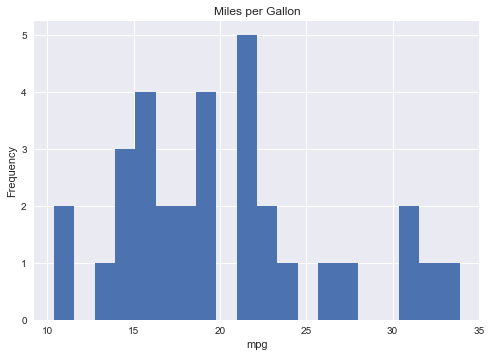

In [66]:
plt.hist(dfcars.mpg.values, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

But pandas is very cool: you can get a histogram directly:

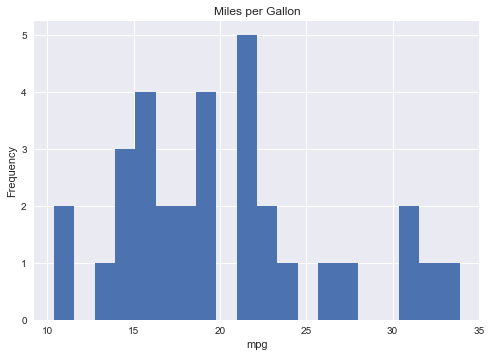

In [67]:
dfcars.mpg.hist(bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

Pandas supports a dictionary like access to columns. This is very useful when column names have spaces: Python variables cannot have spaces in them.

In [68]:
dfcars['mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64


We can also get sub-dataframes by choosing a set of series. We  pass a list of the columns we want as "dictionary keys" to the dataframe.  

In [72]:
dfcars[['am', 'mpg']]

,am,mpg
0,1,21.0
1,1,21.0
2,1,22.8
3,0,21.4
4,0,18.7
5,0,18.1
6,0,14.3
7,0,24.4
8,0,22.8
9,0,19.2


As we'll see, more complex indexing is also possible, using listiness.

### Dataframes and Series

Now that we have our automobile data loaded as a dataframe, we'd like to be able to manipulate it, its series, and its sub-dataframes, say by calculating statistics and plotting distributions of features.  Like arrays and other containers, dataframes and series are listy, so we can apply the list operations we already know to these new containers.  Below we explore our dataframe and its properties, in the context of listiness.

#### Listiness property 1: set length

 The attribute `shape` tells us the dimension of the dataframe, the number of rows and columns in the dataframe, `(rows, columns)`.  Somewhat strangely, but fairly usefully, (which is why the developers of Pandas probably did it ) the `len` function outputs the number of rows in the dataframe, not the number of columns as we'd expect based on how dataframes are built up from pandas series (columns).  

In [73]:
print(dfcars.shape)     # 12 columns, each of length 32
print(len(dfcars))      # the number of rows in the dataframe, also the length of a series
print(len(dfcars.mpg))  # the length of a series

(32, 12)
32
32


#### Listiness property 2: iteration via loops

 One consequence of the column-wise construction of dataframes is that you cannot easily iterate over the rows of the dataframe.  Instead, we iterate over the columns, for example, by printing out the column names via a for loop.  

In [74]:
for ele in dfcars: # iterating iterates over column names though, like a dictionary
    print(ele)

name
mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear
carb


Or we can call the attribute `columns`.  Notice the `Index` in the output below. We'll return to this shortly. 

In [75]:
dfcars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

We can iterate series in the same way that we iterate lists. Here we print out the number of cylinders for each of the 32 vehicles. 

BUT for the same reason as not iterating over numpy arrays, DON'T DO THIS.

In [76]:
for ele in dfcars.cyl:
    print(ele)

6
6
4
6
8
6
8
4
4
6
6
8
8
8
8
8
8
4
4
4
4
8
8
8
8
4
4
4
8
6
8
4


How do you iterate over rows?  Dataframes are put together column-by-column and you should be able to write code which never requires iteration over loops. But if you still find a need to iterate over rows, you can do it using `itertuples`.  See the documentation.  

**In general direct iteration through pandas series/dataframes (and numpy arrays) is a bad idea**, because of the reasons in the earlier "Python Lists vs. Numpy Arrays" section. 

Instead, you should manipulate dataframes and series with pandas methods which are written to be very fast (ie, they access series and dataframes at the C level). Similarly numpy arrays should be accessed directly through numpy methods.

#### Listiness property 3: slice

Let's see how indexing works in dataframes.  Like lists in Python and arrays in numpy, dataframes and series are zero-indexed.

In [77]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [78]:
# index for the dataframe
print(list(dfcars.index))
# index for the cyl series
dfcars.cyl.index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


RangeIndex(start=0, stop=32, step=1)

There are two ways to index dataframes. The `loc` property indexes by label name, while `iloc` indexes by position in the index.  We'll illustrate this with a slightly modified version of `dfcars`, created by relabeling the row indices of `dfcars` to start at 5 instead of 0.  

In [79]:
# create values from 5 to 36
new_index = np.arange(5, 37)
# new dataframe with indexed rows from 5 to 36
dfcars_reindex = dfcars.reindex(new_index)
dfcars_reindex.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0
8,Merc 230,22.8,4.0,140.8,95.0,3.92,3.15,22.90,1.0,0.0,4.0,2.0
9,Merc 280,19.2,6.0,167.6,123.0,3.92,3.44,18.30,1.0,0.0,4.0,4.0


We now return the first three rows of `dfcars_reindex` in two different ways, first with `iloc` and then with `loc`.  With `iloc` we use the command

In [80]:
dfcars_reindex.iloc[0:3]

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.46,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.57,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.19,20.00,1.0,0.0,4.0,2.0


since `iloc` uses the position in the index.  Notice that the argument 0:3 with `iloc` returns the first three rows of the dataframe, which have label names 5, 6, and 7.  To access the same rows with `loc`, we write

In [71]:
dfcars_reindex.loc[0:7] # or dfcars_reindex.loc[5:7]

since `loc` indexes via the label name.  

Here's another example where we return three rows of `dfcars_reindex` that correspond to column attributes `mpg`, `cyl`, and `disp`.  First do it with `iloc`:

In [72]:
dfcars_reindex.iloc[2:5, 1:4]

Notice that rows we're accessing, 2, 3, and 4, have label names 7, 8, and 9, and the columns we're accessing, 1, 2, and 3, have label names `mpg`, `cyl`, and `disp`.  So for both rows and columns, we're accessing elements of the dataframe using the integer position indices.  Now let's do it with `loc`:

In [73]:
dfcars_reindex.loc[7:9, ['mpg', 'cyl', 'disp']]

We don't have to remember that `disp` is the third column of the dataframe the way we did when the data was stored as a numpy array -- we can simply access it with `loc` using the label name `disp`. 

Generally we prefer `iloc` for indexing rows and `loc` for indexing columns. 

>**EXERCISE**: In this exercise you'll examine the documentation to generate a toy dataframe from scratch.  Go to the documentation and click on "10 minutes to pandas" in the table of contents.  Then do the following:

>1.  Create a series called `column_1` with entries 0, 1, 2, 3.

>2.  Create a second series called `column_2` with entries 4, 5, 6, 7.

>3.  Glue these series into a dataframe called `table`, where the first and second labelled column of the dataframe are `column_1` and `column_2`, respectively.  In the dataframe, `column_1` should be indexed as `col_1` and `column_2` should be indexed as `col_2`.

> Oops!  You've changed your mind about the index labels for the columns.  Use `rename` to rename `col_1` as `Col_1` and `col_2` as `Col_2`.  

> *Stretch*: Can you figure out how to rename the row indexes?  Try to rename `0` as `zero`, `1` as `one`, and so on.


In [74]:
# your code here


Picking rows is an idiom you probably wont use very often: there are better ways to do this which we will explore in lecture, such as grouping and querying. Picking columns can often be done by passing a list as a dictionary key.

The place where `loc` and `iloc` are very useful are where you want to change particular rows. We'll see examples of this in lecture.

### Data Types

Columns in a dataframe (series) come with their own types. Some data may be categorical, that is, they come  with only few well defined values. An example is cylinders  (`cyl`). Cars may be 4, 6, or 8 cylindered. There is a ordered interpretation to this  (8 cylinders more powerful engine than 6 cylinders) but also a one-of-three-types interpretation to this. 

Sometimes categorical data does not have an ordered interpretation. An example is `am`: a boolean variable which indicates whether the car is an automatic or not.

Other column types are integer, floating-point, and `object`. The latter is a catch-all for a string or anything Pandas cannot infer, for example, a column that contains data of mixed types. 
 
Let's see the types of the columns:

In [75]:
dfcars.dtypes

As we'll see in lab 2, the `dtypes` attribute is useful for debugging.  If one of these columns is not the type you expect, it can point to missing or malformed values that you should investigate further. Pandas assigns these types by inspection of some of the values,  and if the types are missed it will make assign it as an `object`, like the `name` column. Consider for example:

In [76]:
diff_values = ['a', 1, 2, 3]
diff_series = pd.Series(diff_values)
print(diff_series)
diff_series.dtypes # object because type inference fails

In [78]:
diff_series.values # you destroyed performance, numpy starts to act like a python list

In [79]:
same_values = [2, 3, 4]
same_series = pd.Series(same_values)
print(same_series)
same_series.dtypes # correctly infers ints

In [80]:
same_series.head()

### *Aside: Pandas and memory*

Notice that we did above:

`dfcars=dfcars.rename(columns={"Unnamed: 0": "name"})`

In other words we bound the same name `dfcars` to the result of the `rename` method.

The `rename` operation  creates a new dataframe. This is an example of "functional programming" where we always create new objects from functions, rather than changing old ones. After doing this, we just renamed the new dataframe with the old name  `dfcars`. This is because variables in Python are just post-its, labels, or *bindings*: they are just aliases for a piece of memory.  The `rename` method on dataframes creates a new dataframe, and we rebind the variable `dfcars` to point to this new piece of memory. What about the old piece of memory `dfcars` pointed to? Its now  bindingless and will be destroyed by Python's garbage collector. This is how Python manages memory on your computer.

This is the recommended style of Python programming unless you have very limited memory on your computer. Don't create a `dfcars2` dataframe.

But you might, quite rightly argue, what if the dataframe is huge and you have very limited memory? For this reason, almost all Pandas methods have a `inplace=True` option, see the `rename` docs for example.  You can then say:

```
dfcars.rename(columns={"Unnamed: 0":"name"}, inplace=True)
```

Now the old dataframe is changed in place.

That being said, don't do this if at all possible.  While it takes less memory (and thus you might sometimes need to do it), structures in place needs careful ordering and tracking of operations.  And, as human beings, we tend to be fallible.

(Even in big-data programs like Hadoop and Spark, new objects are created. Why?  In these cases you are typically working on multiple machines.  What if one goes down while an operation is happening? You then at least have all of the old dataframe parts on all the machines, rather than some parts having changed. This is the advantage of functional programming using "immutable" data structures.)

## Part 4:  Exploratory Data Analysis (EDA) - Global Properties

Below is a basic checklist for the early stages of exploratory data analysis in Python. While not universally applicable, the rubric covers patterns which recur in several data analysis contexts, so useful to keep it in mind when encountering a new dataset.

The basic workflow (enunciated in this form by Chris Beaumont, the first Head TF of cs109 ever) is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
    
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms the data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to follow-up on in subsequent analysis.

So far we have **built** the dataframe from automobile data, and carried out very minimal **cleaning** (renaming) in this dataframe.  We'll now visualize global  properties of our dataset.  We illustrate the concepts using `mpg`.  A similar analysis should be done for all the data columns, as this may help identify interesting properties and even errors in the dataset.  **Group** properties will be discussed later in Monday's lecture.

### Histograms
A histogram shows the frequency distribution of a dataset.  Below is the distribution of `mpg`.  The `.hist` method of a pandas series plots the distribution, and the seaborn package sets the global `matplotlib` plotting context.  Here, we've used `notebook`, which makes reasonable sized graphics in seaborn's default color palette.  

In [81]:
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options

In [82]:
sns.set_context("notebook")
dfcars.mpg.plot.hist()  
plt.xlabel("mpg");

We could have made the same histogram with `matplotlib` using the `hist` function.   We can use `matplotlib` on a pandas series or any other listy container which we might do, for example, if a certain type of plot is not yet supported by pandas.  Below we use `matplotlib`  `hist`, set the seaborn context to `poster` to create a larger graphic, add axes labels and titles, and change the number of bins from the default.  

In [83]:
sns.set_context("poster")
plt.hist(dfcars.mpg, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency")
plt.title("Miles per Gallon");

Check out the documentation for even more options!

>**EXERCISE**: Plot the distribution of the rear axle ratio (`drat`).  Label the axes accordingly and give the plot a title.    Calculate the mean of the distribution, and, if you like, draw a line on the figure showing the location of the mean (see the documentation for `axvline`).


In [84]:
# your code here


### Scatter plots
We often want to see co-variation among our columns, for example, miles/gallon versus weight.  This can be done with a scatter plot. 

In [85]:
sns.set_context("notebook")
plt.scatter(dfcars.wt, dfcars.mpg);
plt.xlabel("weight");
plt.ylabel("miles per gallon");

You could have used `plot` instead of `scatter`.  Let's look at the `plot` documentation.

In [86]:
# look at the .plot documentation
plt.plot?

And plot the data as dots.

In [87]:
plt.plot(dfcars.wt, dfcars.mpg, 'o');
plt.xlabel("weight");
plt.ylabel("miles per gallon");

Usually we use `plt.show()` at the end of every plot to display the plot. Our magical incantation `%matplotlib inline` takes care of this for us, and we don't have to do it in the Jupyter notebook. But if you run your Python program from a file, you will need to explicitly have a call to show. We include it for completion.

In [88]:
plt.plot(dfcars.wt, dfcars.mpg, 'ko')  #black dots
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.show()

Suppose we'd like to save a figure to a file.  We do this by including the `savefig` command in the same cell as the plotting commands.  The file extension tells you how the file will be saved. 

In [89]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.savefig('images/foo1.pdf')
plt.savefig('images/foo2.png', bbox_inches='tight') #less whitespace around image

And this is what the saved png looks like. Code in Markdown to show this is:

`![](images/foo2.png)`

![](images/foo2.png)

Finally, look what happens if we plot the data as dots connected by a line.  We get a useless soup!

In [112]:
plt.plot(dfcars.wt, dfcars.mpg, 'o-')  
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.show()

To fix this problem, we make a new dataframe with the columns of interest, sort it based on the x-value (`wt` in this case), and plot the sorted data.

In [113]:
sub_dfcars = dfcars[['wt', 'mpg']]
df_temp = sub_dfcars.sort_values('wt')
plt.plot(df_temp.wt, df_temp.mpg, 'o-');
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.show()

Below is a summary of the most commonly used `matplotlib` plotting routines.

![](images/mpl1.png)

>**EXERCISE**: Create a scatter plot showing the co-variation between two columns of your choice.  Label the axes.  See if you can do this *without* copying and pasting code from earlier in the lab.  What can you conclude, if anything, from your scatter plot?

In [120]:
# your code here


## Part 5: Conclusions

In this lab we introduced functions, the numpy and pandas libraries, and beginning EDA through histograms and scatter polots.  We've tried to consolidate the information as much as possible, so have necessarily left out other topics of interest.  For more practice exercises (with solutions) and discussion, see this [page](http://www.practicepython.org).  Some of these exercises are particularly relevant.  Check them out!

Don't forget to look up [Jake's book](https://jakevdp.github.io/PythonDataScienceHandbook/).

Finally, we would like to suggest using [Chris Albon's web site](https://chrisalbon.com) as a reference. Lots of useful information there.